### Analiysis Data
1. conncet python and MySQL   
2. Read name of dataframe as folder  
        - State ---------------------
3. Checking the normality of data presentation ( customers )

In [12]:
# basic Library
import os

# Connector python and MySQL
import pymysql
import json

# Analysis Library
import numpy as np
import pandas as pd

# Statistical Library
import scipy.stats as stats

# Plot Library
import matplotlib.pyplot as plt
import seaborn as sns


1. connect python and MySQL

In [2]:
# config databsae
with open ("D:/python/Online store dataset/Analysis data/notebooks/Python/config.json","r") as config_file:
    db_config = json.load(config_file)

print(db_config)

# connector database
conn = pymysql.connect(
    host=db_config['host'],
    port=db_config['port'],
    user=db_config['user'],
    password=db_config['password'],
    database=db_config['database']
)

print("Connected to MySQL successfully!")

{'host': 'localhost', 'port': 3306, 'user': 'root', 'password': '123456789', 'database': 'online_store_dataset'}
Connected to MySQL successfully!


path of file and read name of table

In [3]:
path = "D:/python/Online store dataset/Analysis data/data/processed/dataframe"
dir_list = os.listdir(path)

Read Table and Create Dataframe 

In [5]:
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}            and file {var_name}")
    globals()[var_name] = (pd.read_csv(f'D:/python/Online store dataset/Analysis data/data/processed/dataframe/{file_name}')
                            .drop("Unnamed: 0", axis=1))

name customers            and file customers
name employees            and file employees
name offices            and file offices
name orderdetails            and file orderdetails
name orders            and file orders
name payments            and file payments
name productlines            and file productlines
name products            and file products


3. Checking the normality of data presentation (customers )

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerNumber          122 non-null    int64  
 1   customerName            122 non-null    object 
 2   contactLastName         122 non-null    object 
 3   contactFirstName        122 non-null    object 
 4   phone                   122 non-null    object 
 5   addressLine1            122 non-null    object 
 6   addressLine2            22 non-null     object 
 7   city                    122 non-null    object 
 8   state                   49 non-null     object 
 9   postalCode              115 non-null    object 
 10  country                 122 non-null    object 
 11  salesRepEmployeeNumber  100 non-null    float64
 12  creditLimit             122 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 12.5+ KB


In [9]:
customers["creditLimit"].describe()

count       122.000000
mean      67659.016393
std       45043.370751
min           0.000000
25%       42175.000000
50%       76700.000000
75%       95075.000000
max      227600.000000
Name: creditLimit, dtype: float64

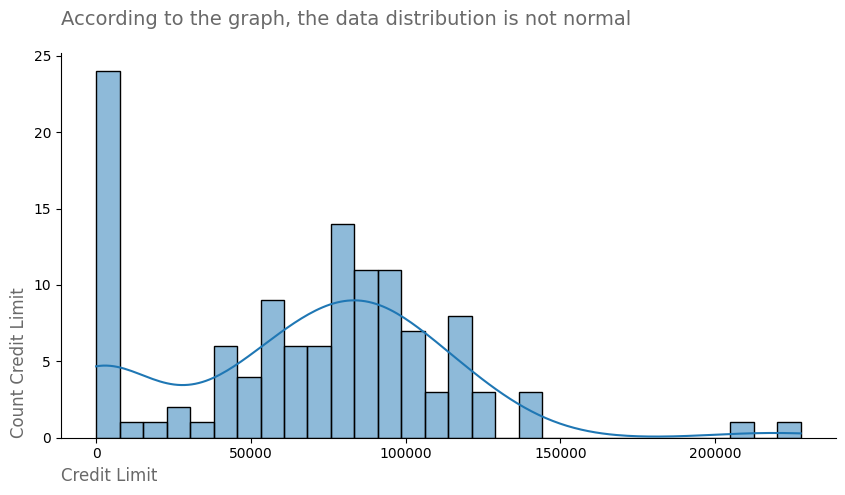

In [38]:
fig, ax = plt.subplots(1)

# size
fig.set_size_inches(10, 5)
# histogram by seaborn
ax = sns.histplot(data=customers, x="creditLimit", bins=30, kde=True)

# titel and label
ax.set_title("According to the graph, the data distribution is not normal", fontsize=14, loc='left', pad=20, color='dimgray')
ax.set_xlabel("Credit Limit", fontsize=12, loc='left', color='dimgray')
ax.set_ylabel("Count Credit Limit", fontsize=12, loc='bottom', color='dimgray')

# remove spines 
ax.spines[["top", "right"]].set_visible(False)


plt.show()


QQ plot : Is *customers["creditLimit"]* normal ? no

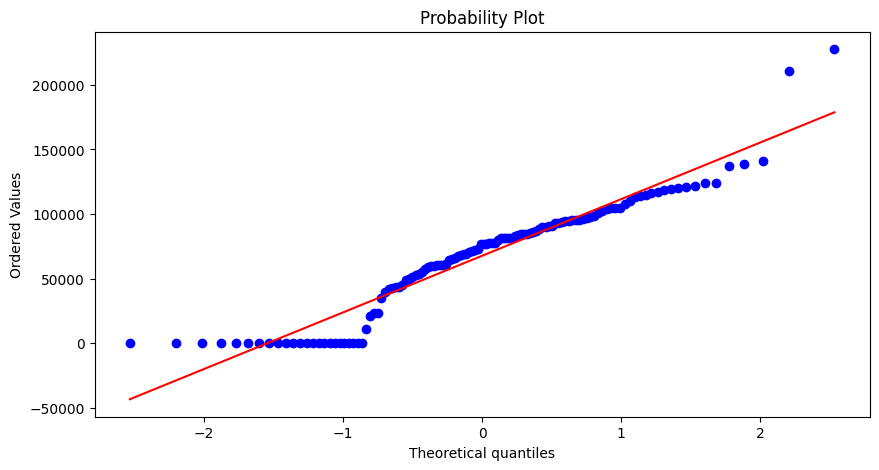

In [ ]:
# QQ plot
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 5)
ax = stats.probplot(customers["creditLimit"], fit=True, plot=plt)
plt.show()